In [1]:
seq='ACGT'
l=len(seq)
e=''
seq=['A','C','G','T']
print(''.join(seq))


ACGT


In [ ]:
#Random sequences
import random
random.seed(7)
random.choice('ACGT')

'G'

In [ ]:
seq=''
for _ in range(10):
  seq+=random.choice('ACGT')
print(seq)

CTAAAGACAA


In [ ]:
#Using join to generate sequence
seq=''.join([random.choice('ACGT') for _ in range(10)])
print(seq)

TACACGTCAG


In [ ]:
seq[1:3]

'AC'

In [ ]:
seq[:3] #same as seq[0:3]

'TAC'

In [ ]:
seq[7:len(seq)] #same as seq[7:]

'CAG'

In [ ]:
seq[-3]

'C'

In [ ]:
def LongestCommonPrefix(s1,s2):
  i=0
  while i<len(s1) and i<len(s2) and s1[i]==s2[i] :
    i+=1

  return s1[:i]

LongestCommonPrefix('ACCATGT','ACCAGAC')


'ACCA'

In [ ]:
def match(s1,s2):
  if not len(s1)==len(s2):
    return False
  for i in range(len(s1)):
    if not s1[i]==s2[i]:
      return False
  
  return True

print(match('ACGT','ACGT'))

True


In [ ]:
complement={'A':'T','C':'G','G':'C','T':'A'}
def reverseComplement(s):
  complement={'A':'T','C':'G','G':'C','T':'A'}
  t=''
  for base in s:
    t=complement[base]+t
  return t
reverseComplement('ACCGTCG')

'CGACGGT'

In [ ]:
#Reading genomes in file
def readGenome(filename):
  genome=''
  with open(filename,'r') as f:
    for line in f:
      if not line[0]=='>':
        genome+=line.rstrip()
  return genome


genome=readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [ ]:
len(genome)

48502

In [ ]:
#counting frequency of each base
counts={'A':0,'C':0,'G':0,'T':0}
for base in genome:
  counts[base]+=1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [ ]:
#Using python module counter
import collections
collections.Counter(genome)

Counter({'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986})

WORKING WITH SEQUENCING READS IN FASTQ FORMAT

In [ ]:
#Working with sequencing reads
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2021-03-22 16:37:36--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.182.64, 13.32.182.160, 13.32.182.138, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.182.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.04s   

2021-03-22 16:37:36 (5.91 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True: #Reading first 4 line in FASTQ 
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line as plus sign is there
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0: #Checking whether we reach to end of file
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [ ]:
print(seqs[:5]) #printing first 5 sequence

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


In [ ]:
print(quals[:5]) #printing first 5 qualities

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [ ]:
#Convert ASCII symbols to quality scores
def phred33ToQ(qual):
    return ord(qual) - 33

In [ ]:
phred33ToQ('#')

2

Analysis of data sets using histogram

In [ ]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50 #frequency
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


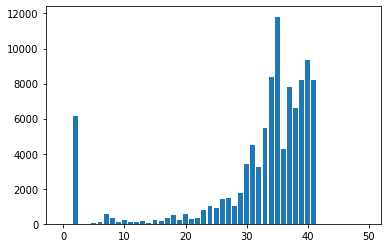

In [ ]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()
#low Q values like 2 corresponds to high probability that call is incorrect is high

**Analyzing reads by position**
The fraction of the genome that contains G's and C's that is different from species to species. We want to plot whether any strange is happening or not ,the G's and C's must not change much.

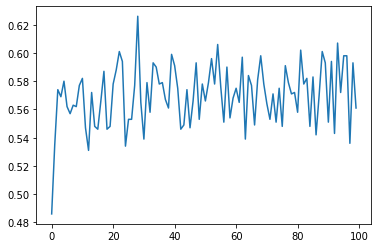

In [ ]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

#average gc constant is 0.5

In [ ]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

#GC content is above 0.5
#N is there when there is no confidence:sequencer is not able to recognize base

Counter({'A': 21132, 'C': 28272, 'G': 28742, 'N': 18, 'T': 21836})

In [ ]:
def naive(p, t):   #p matches with t check
    occurrences = []
    for i in range(len(t) - len(p) + 1):  #loop over all alignments
        match = True
        for j in range(len(p)):  #loop over characters
            if t[i+j] != p[j]:   #compare characters
                match = False
                break
        if match:          #all characters matched,record
          occurrences.append(i) 
    return occurrences

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2021-03-22 18:58:29--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.80.61, 13.32.80.37, 13.32.80.44, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.80.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2021-03-22 18:58:29 (391 MB/s) - ‘phix.fa’ saved [5528/5528]



In [ ]:
#Function that parses a DNA reference genome from a file in the FASTA format
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [ ]:
genome = readGenome('phix.fa')

In [ ]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [ ]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [ ]:
# Generate 100 reads of length 100
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2021-03-22 19:08:41--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.80.37, 13.32.80.89, 13.32.80.61, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.80.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K   812KB/s    in 0.3s    

2021-03-22 19:08:42 (812 KB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [ ]:
#Function that parses the read and quality strings from FASTQ file containing sequencing reads
def readFastq(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

In [ ]:
import collections
phix_reads = readFastq('ERR266411_1.first1000.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'A': 28426, 'C': 21890, 'G': 19147, 'N': 6, 'T': 30531})

In [ ]:
numMatched = 0
n = 0 #total no. of reads that we processed
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

#very few matches may be because of sequencing errors

7 / 1000 reads matched the genome exactly!


In [ ]:
# Now let's try matching just the first 30 bases of each read (part of read)
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

#result is close to half ,in this case reads are alighning and genome is double stranded and reads can come from one strand or another strand
#exact matchi g is setup only for one of 2 strand ,so matching is less than half for most of cases

459 / 1000 reads matched the genome exactly!


In [ ]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

matching is best here as we match 30 base prediction at a time and reverse complement matching is also considered, while due to some sequencing error ,we get 932 out of 1000.

In [ ]:
#we consider matching not only reads of genome but also reverse complements of genome

numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))



932 / 1000 reads matched the genome exactly!


In [2]:
#Boyer Moore-algorithm
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [3]:
#Bad character rule
# GCTAGCTCTACGAGTCTA
#TCAA
p = 'TCAA'
p_bm = BoyerMoore(p, alphabet='ACGT') #preprocessing object
p_bm.bad_character_rule(2, 'T') #provide with offset in mismatch, and mismatch in T
#skip of 2 is obtained

2

In [5]:
#Good suffix rule
# GCTAGCTCTACGAGTCTA
# ACTA  
p = 'ACTA'
p_bm = BoyerMoore(p, alphabet='ACGT') #preprocessing object
p_bm.good_suffix_rule(0) 
#Moves along until prefix of p matches the suffix of T
#skip of 2 is obtained

3

In [6]:
# ACACGCTCTACGAGTCTA
# ACAC
p = 'ACAC'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.match_skip()

#Again good suffix has been done-special case of good suffix

2

In [10]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1: #Loop through alignments,all positions where p can start
        shift = 1   #for naive,shift =1(always),here greater than 1
        mismatched = False
        for j in range(len(p)-1, -1, -1): #going back
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [11]:
#test
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p, alphabet='ACGT')
boyer_moore(p, p_bm, t)

[6, 14]